Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

Importing Data

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Train',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Test',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 13464 images belonging to 28 classes.
Found 3360 images belonging to 28 classes.


Building CNN Model

In [88]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 28, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                73792     
_________________________________________________________________
dense_11 (Dense)             (None, 28)               

Training model

In [91]:
model.fit_generator(train_generator,
                         steps_per_epoch = 20,
                         epochs = 10,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/10
20/20 [==============================] - 4s 178ms/step - loss: 1.4933 - accuracy: 0.5437 - val_loss: 1.3106 - val_accuracy: 0.5859
Epoch 2/10
20/20 [==============================] - 4s 180ms/step - loss: 1.2919 - accuracy: 0.5891 - val_loss: 1.2866 - val_accuracy: 0.6055
Epoch 3/10
20/20 [==============================] - 4s 178ms/step - loss: 1.2994 - accuracy: 0.6031 - val_loss: 1.2045 - val_accuracy: 0.6133
Epoch 4/10
20/20 [==============================] - 4s 178ms/step - loss: 1.3176 - accuracy: 0.6031 - val_loss: 1.2828 - val_accuracy: 0.5762
Epoch 5/10
20/20 [==============================] - 4s 180ms/step - loss: 1.3571 - accuracy: 0.5734 - val_loss: 1.2925 - val_accuracy: 0.6250
Epoch 6/10
20/20 [==============================] - 4s 177ms/step - loss: 1.3960 - accuracy: 0.5703 - val_loss: 1.1046 - val_accuracy: 0.6582
Epoch 7/10
20/20 [==============================] - 4s 179ms/step - loss: 1.2512 - accuracy: 0.6266 - val_loss: 1.2302 - val_accuracy: 0.6270
Epoch 

Defining the function to print predicted alphabet

In [86]:
def get_result(result):
    if result[0][0] == 1:
        return('ا')
    elif result[0][1] == 1:
        return ('ب')
    elif result[0][2] == 1:
        return ('ت')
    elif result[0][3] == 1:
        return ('ث')
    elif result[0][4] == 1:
        return ('ج')
    elif result[0][5] == 1:
        return ('ح')
    elif result[0][6] == 1:
        return ('خ')
    elif result[0][7] == 1:
        return ('د')
    elif result[0][8] == 1:
        return ('ذ')
    elif result[0][9] == 1:
        return ('ر')
    elif result[0][10] == 1:
        return ('ز')
    elif result[0][11] == 1:
        return ('س')
    elif result[0][12] == 1:
        return ('ش')
    elif result[0][13] == 1:
        return ('ص')
    elif result[0][14] == 1:
        return ('ض')
    elif result[0][15] == 1:
        return ('ط')
    elif result[0][16] == 1:
        return ('ظ')
    elif result[0][17] == 1:
        return ('ع')
    elif result[0][18] == 1:
        return ('غ')
    elif result[0][19] == 1:
        return ('ف')
    elif result[0][20] == 1:
        return ('ق')
    elif result[0][21] == 1:
        return ('ك')
    elif result[0][22] == 1:
        return ('ل')
    elif result[0][23] == 1:
        return ('م')
    elif result[0][24] == 1:
        return ('ن')
    elif result[0][25] == 1:
        return ('و')
    elif result[0][26] == 1:
        return ('ة')
    elif result[0][27] == 1:
        return ('ى')

Predicting Alphabet

Predicted Alphabet is: د


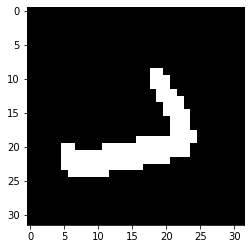

In [93]:
filename = r'Test\8-daa\id_15_label_8.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))